In [17]:
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import hvplot.xarray
%matplotlib qt

In [18]:
dfList = []
list1 = np.arange(10, 100, 10).tolist()
list2 = np.arange(150, 0, 50).tolist()
list3 = np.arange(110, 280, 10).tolist()
remove = [150, 200, 250]

for i in remove:
    list3.remove(i)

values = list1 + list2
for i in range(5):
    df = pd.read_csv('./2019-06-29/2Vcalib_Bpos_%gm_calibrationCheck_2019-06-29_1.csv' % values[i], comment="#")
    dfList.append(df)
    
# for i in range(len(list3)):
#     df = pd.read_csv('./2019-06-30/2Vcalib_Bpos_%gm_calibrationCheck_2019-06-30_1.csv' % list3[i], comment="#")
#     dfList.append(df)

In [14]:
df1 = dfList[0]
fieldatzero = df1[abs(df1.theta)<0.01].Bmag.values[0]
print(fieldatzero)

0.009815391444802243


### B vs theta for different B center, calibration done at 2V

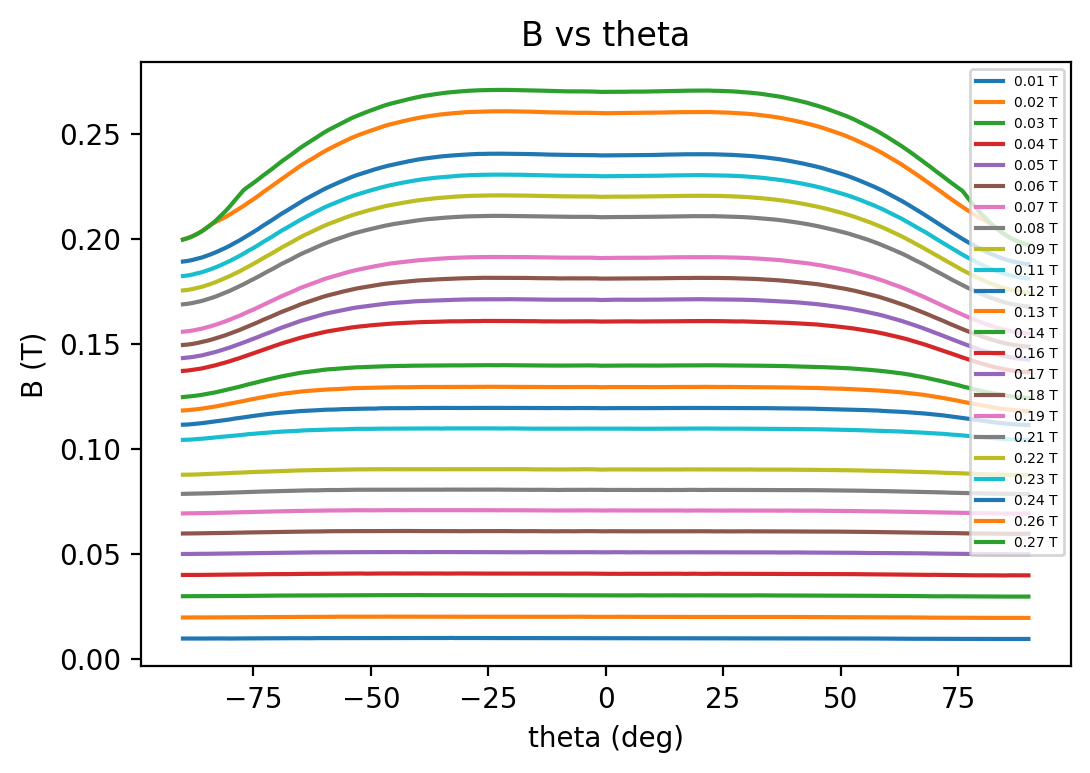

In [4]:
plt.figure(dpi=200)
def plotCurve(df):
    plt.plot(df.theta, df.Bmag, label = '%.2f T' % df.Bmag.max())
    
for df in dfList:
    plotCurve(df)

plt.title('B vs theta')
plt.xlabel('theta (deg)')
plt.ylabel('B (T)')
plt.legend(prop={'size': 5})

### Percentage deviation from center field

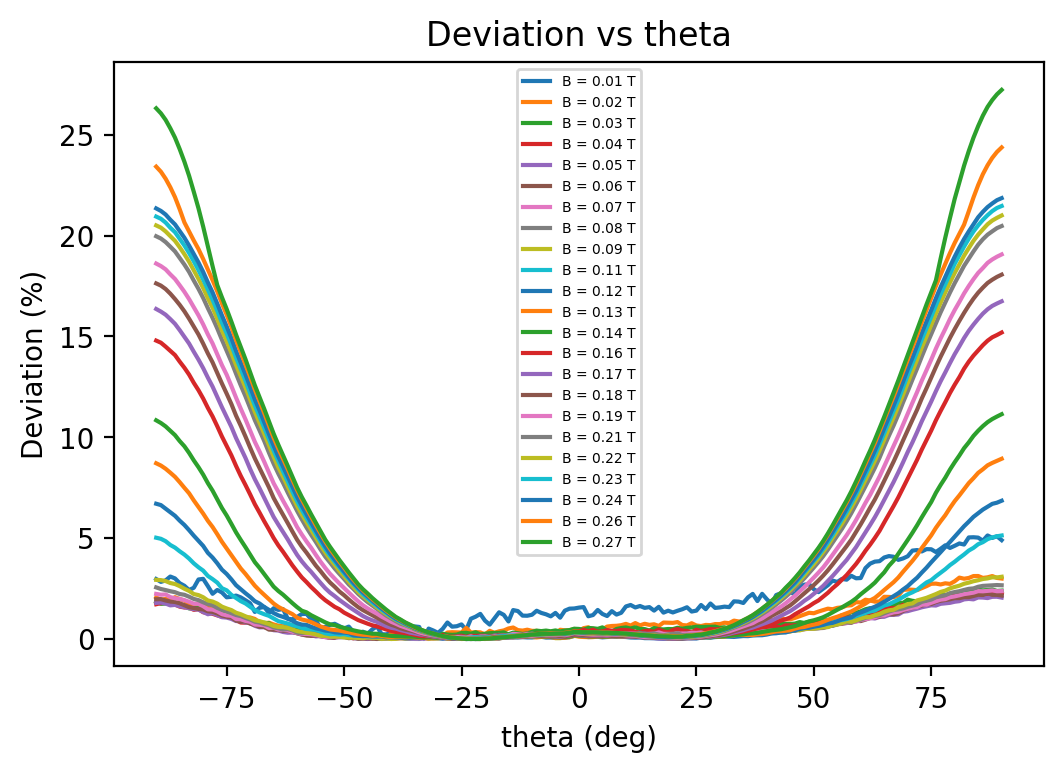

In [5]:
plt.figure(dpi=200)
def plotsd(df):
    deviation = (abs(df.Bmag.values - df.Bmag.max()))/df.Bmag.max()*100
    plt.plot(df.theta, deviation, label = 'B = %.2f T' % df.Bmag.values.max())
    plt.legend(prop={'size': 5})

for i in range(len(dfList)):
    plotsd(dfList[i])
    
plt.title('Deviation vs theta')
plt.xlabel('theta (deg)')
plt.ylabel('Deviation (%)')
plt.legend(prop={'size': 5})

In [19]:
plt.figure(dpi=200)
def plotsd(df):
    deviation = (df.Bmag.values - df[abs(df.theta)<0.01].Bmag.values[0])
    plt.plot(df.theta, deviation, label = 'B = %.2f T' % df.Bmag.values.max())
    plt.legend(prop={'size': 5})

for i in range(len(dfList)):
    plotsd(dfList[i])
    
plt.title('Deviation vs theta')
plt.xlabel('theta (deg)')
plt.ylabel('Deviation (T)')
plt.legend(prop={'size': 5})